In [ ]:
!pip install qgrid
import pandas as pd
import numpy as np
import qgrid
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

     |████████████████████████████████| 889 kB 31.5 MB/s 
  Created wheel for qgrid: filename=qgrid-1.3.1-py2.py3-none-any.whl size=1761271 sha256=1f11c0eb1bcf58a709db1a2551300e722252a639439d0522373fc05498eacbf5
  Stored in directory: /root/.cache/pip/wheels/53/87/cb/c63a58774627471976061afb5b8657b76d2268c1e76e980586
Successfully built qgrid


In [ ]:
DatosConNulls = pd.read_csv("water_potability.csv", names = None, sep = ",")
df1=DatosConNulls[DatosConNulls['Potability']==1].copy()
df2=DatosConNulls[DatosConNulls['Potability']==0].copy()
df1['ph']=df1['ph'].replace(np.nan, df1['ph'].median())
df2['ph']=df2['ph'].replace(np.nan, df2['ph'].median())
df1['Sulfate']=df1['Sulfate'].replace(np.nan, df1['Sulfate'].median())
df2['Sulfate']=df2['Sulfate'].replace(np.nan, df2['Sulfate'].median())
df1['Trihalomethanes']=df1['Trihalomethanes'].replace(np.nan, df1['Trihalomethanes'].median())
df2['Trihalomethanes']=df2['Trihalomethanes'].replace(np.nan, df2['Trihalomethanes'].median())
Datos=pd.concat([df1,df2], axis=0, ignore_index=True)
Datos.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
Datos

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
1,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
2,7.036752,169.974849,23403.637304,8.519730,331.838167,475.573562,12.924107,50.861913,2.747313,1
3,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
4,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,6.616731,195.096968,34277.760400,7.632639,333.389426,417.465080,13.432557,47.945936,3.622379,0
3272,7.734569,230.919506,21776.594455,6.908591,333.389426,395.114961,15.033557,92.697369,3.821456,0
3273,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0
3274,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0


In [ ]:
X = Datos.iloc[:, 0:9] #Tomamos las muestras y caracteristicas
X = X.astype(np.float) #Convierto X a float

In [ ]:
def fisher_index(X, plot=True):
    C = X.shape[1]
    indexes = np.zeros(9)

    j = 0
    for i in range(C):
        if_j = 0
        for k in range(C):
            if i == k:
                continue
            mean_i = np.mean(X[:,i])
            mean_k = np.mean(X[:,k])
            std_i = np.std(X[:,i])
            std_k = np.std(X[:,k])

            if_j += ((mean_i - mean_k)**2 )/(std_i**2 + std_k**2)
        indexes[j] = if_j
        j += 1

    indexes = indexes / np.max(indexes)
  
    if plot == True:
        x = np.array(np.linspace(0, C, C))
        y = indexes
        plt.stem(x, y, use_line_collection=True)
        plt.xlabel('Variables')
        plt.ylabel('Índice de fisher')
        plt.show()    
    return indexes

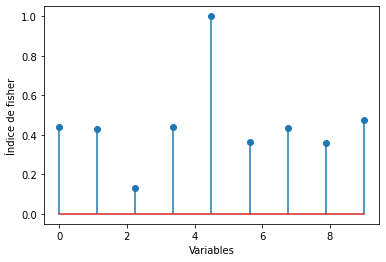

array([0.44028952, 0.42790323, 0.12965921, 0.43881877, 1.        ,
       0.36475801, 0.43566307, 0.35930468, 0.47478954])

In [ ]:
fisher_index(np.array(X))